In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset=pd.read_csv('AB_NYC_2019.csv')

In [3]:
dataset.shape

(48895, 16)

In [4]:
dataset.describe()

id  ...  availability_365
count  4.889500e+04  ...      48895.000000
mean   1.901714e+07  ...        112.781327
std    1.098311e+07  ...        131.622289
min    2.539000e+03  ...          0.000000
25%    9.471945e+06  ...          0.000000
50%    1.967728e+07  ...         45.000000
75%    2.915218e+07  ...        227.000000
max    3.648724e+07  ...        365.000000

[8 rows x 10 columns]

In [5]:
dataset.head()

id  ... availability_365
0  2539  ...              365
1  2595  ...              355
2  3647  ...              365
3  3831  ...              194
4  5022  ...                0

[5 rows x 16 columns]

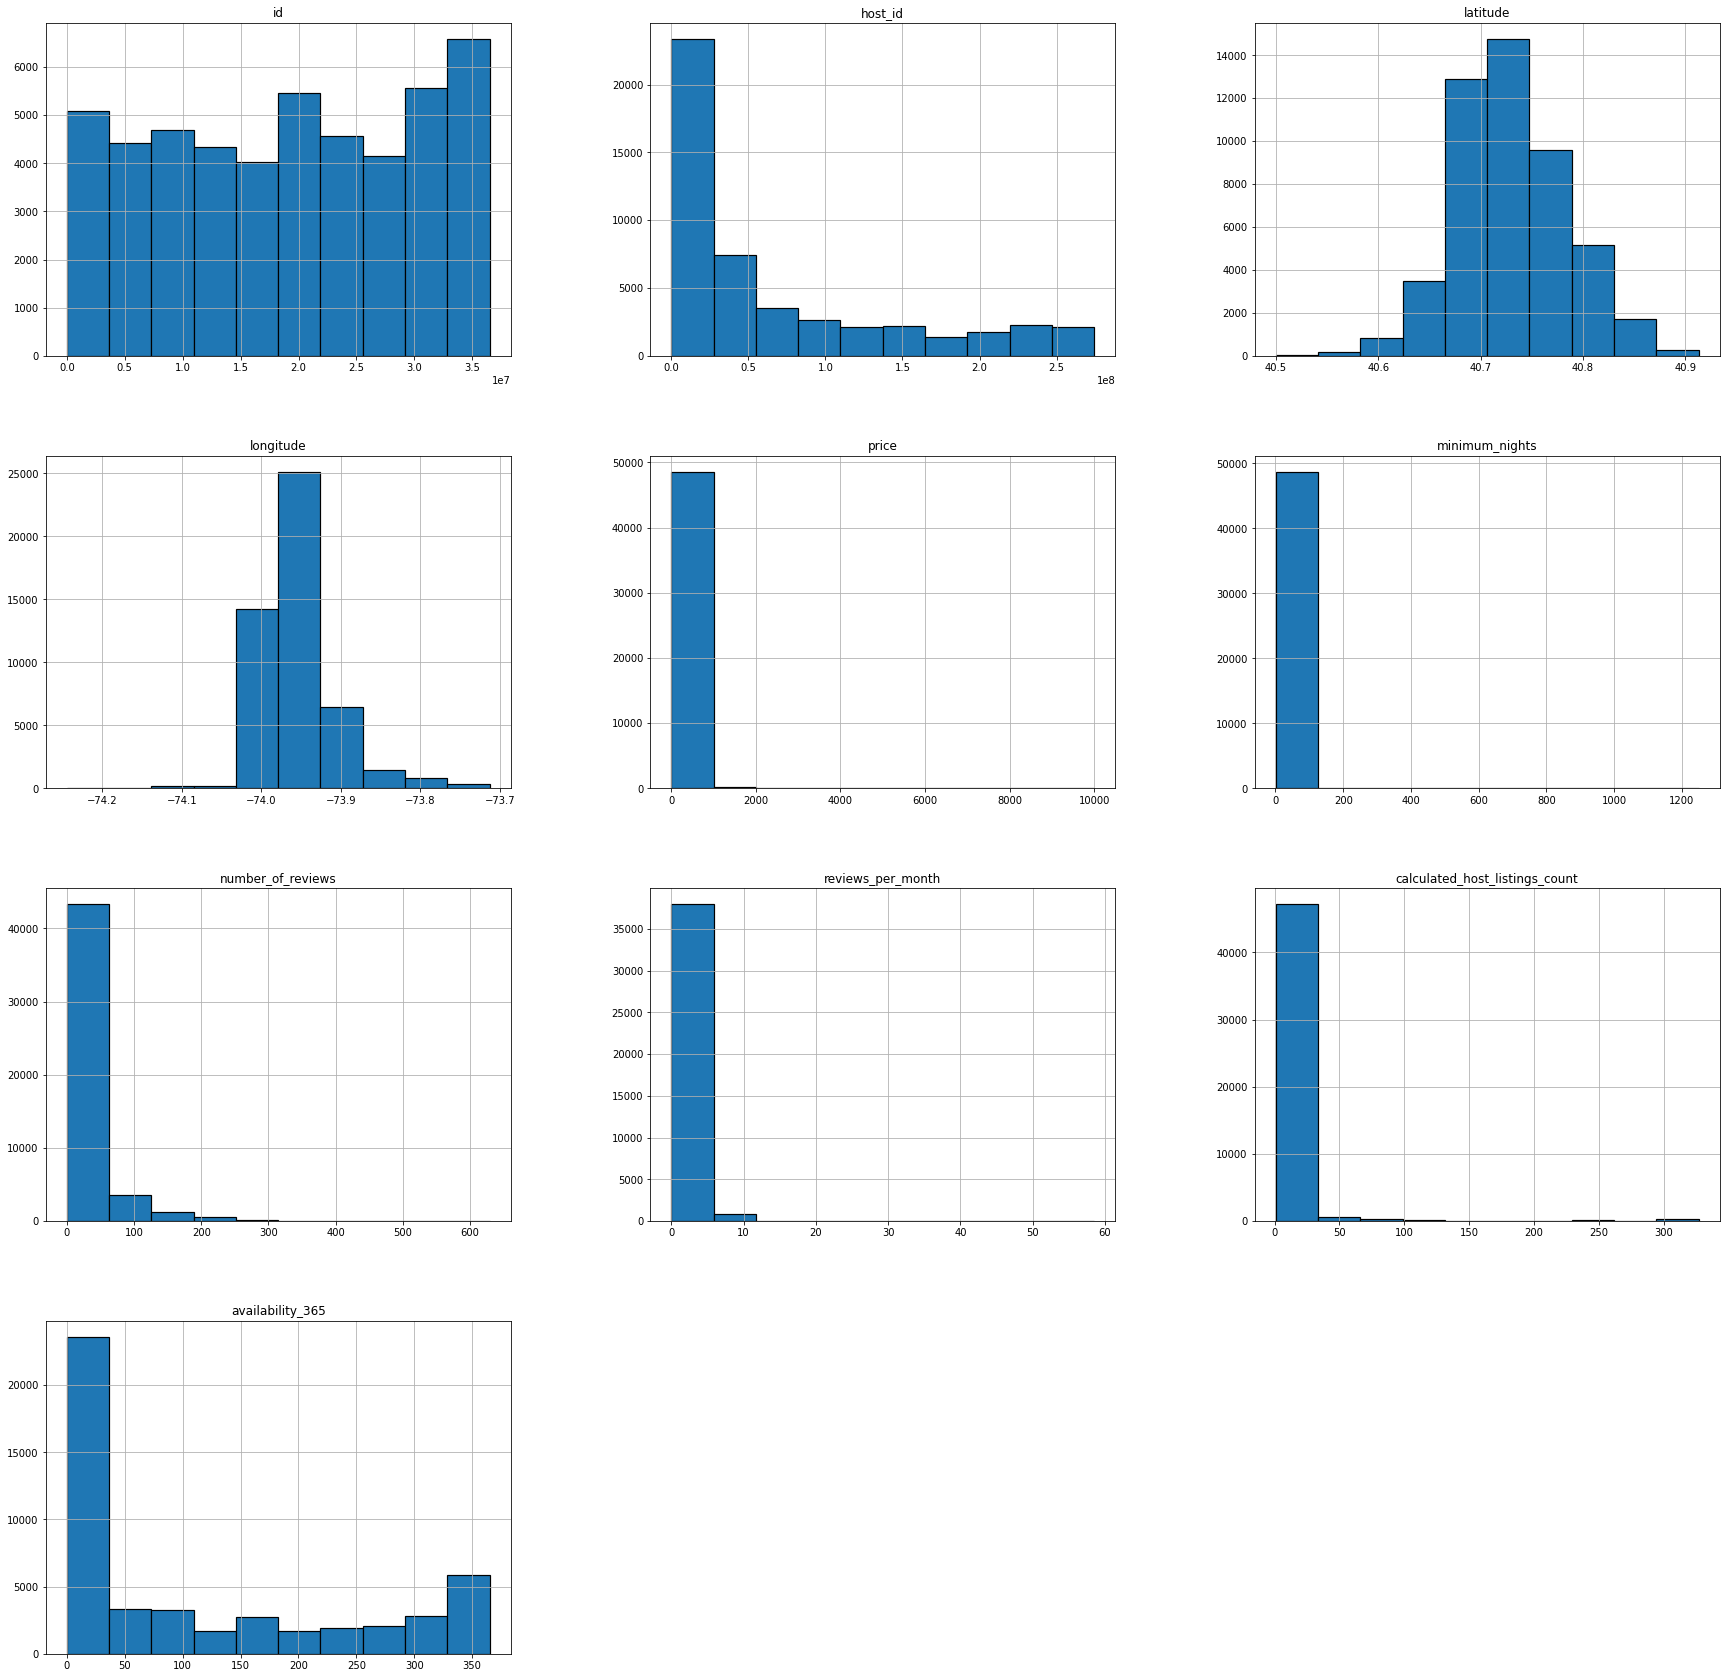

In [6]:
# Visualizing the distribution for every "feature"
dataset.hist(edgecolor="black", linewidth=1.2, figsize=(30, 30));

<Figure size 2160x2160 with 0 Axes>

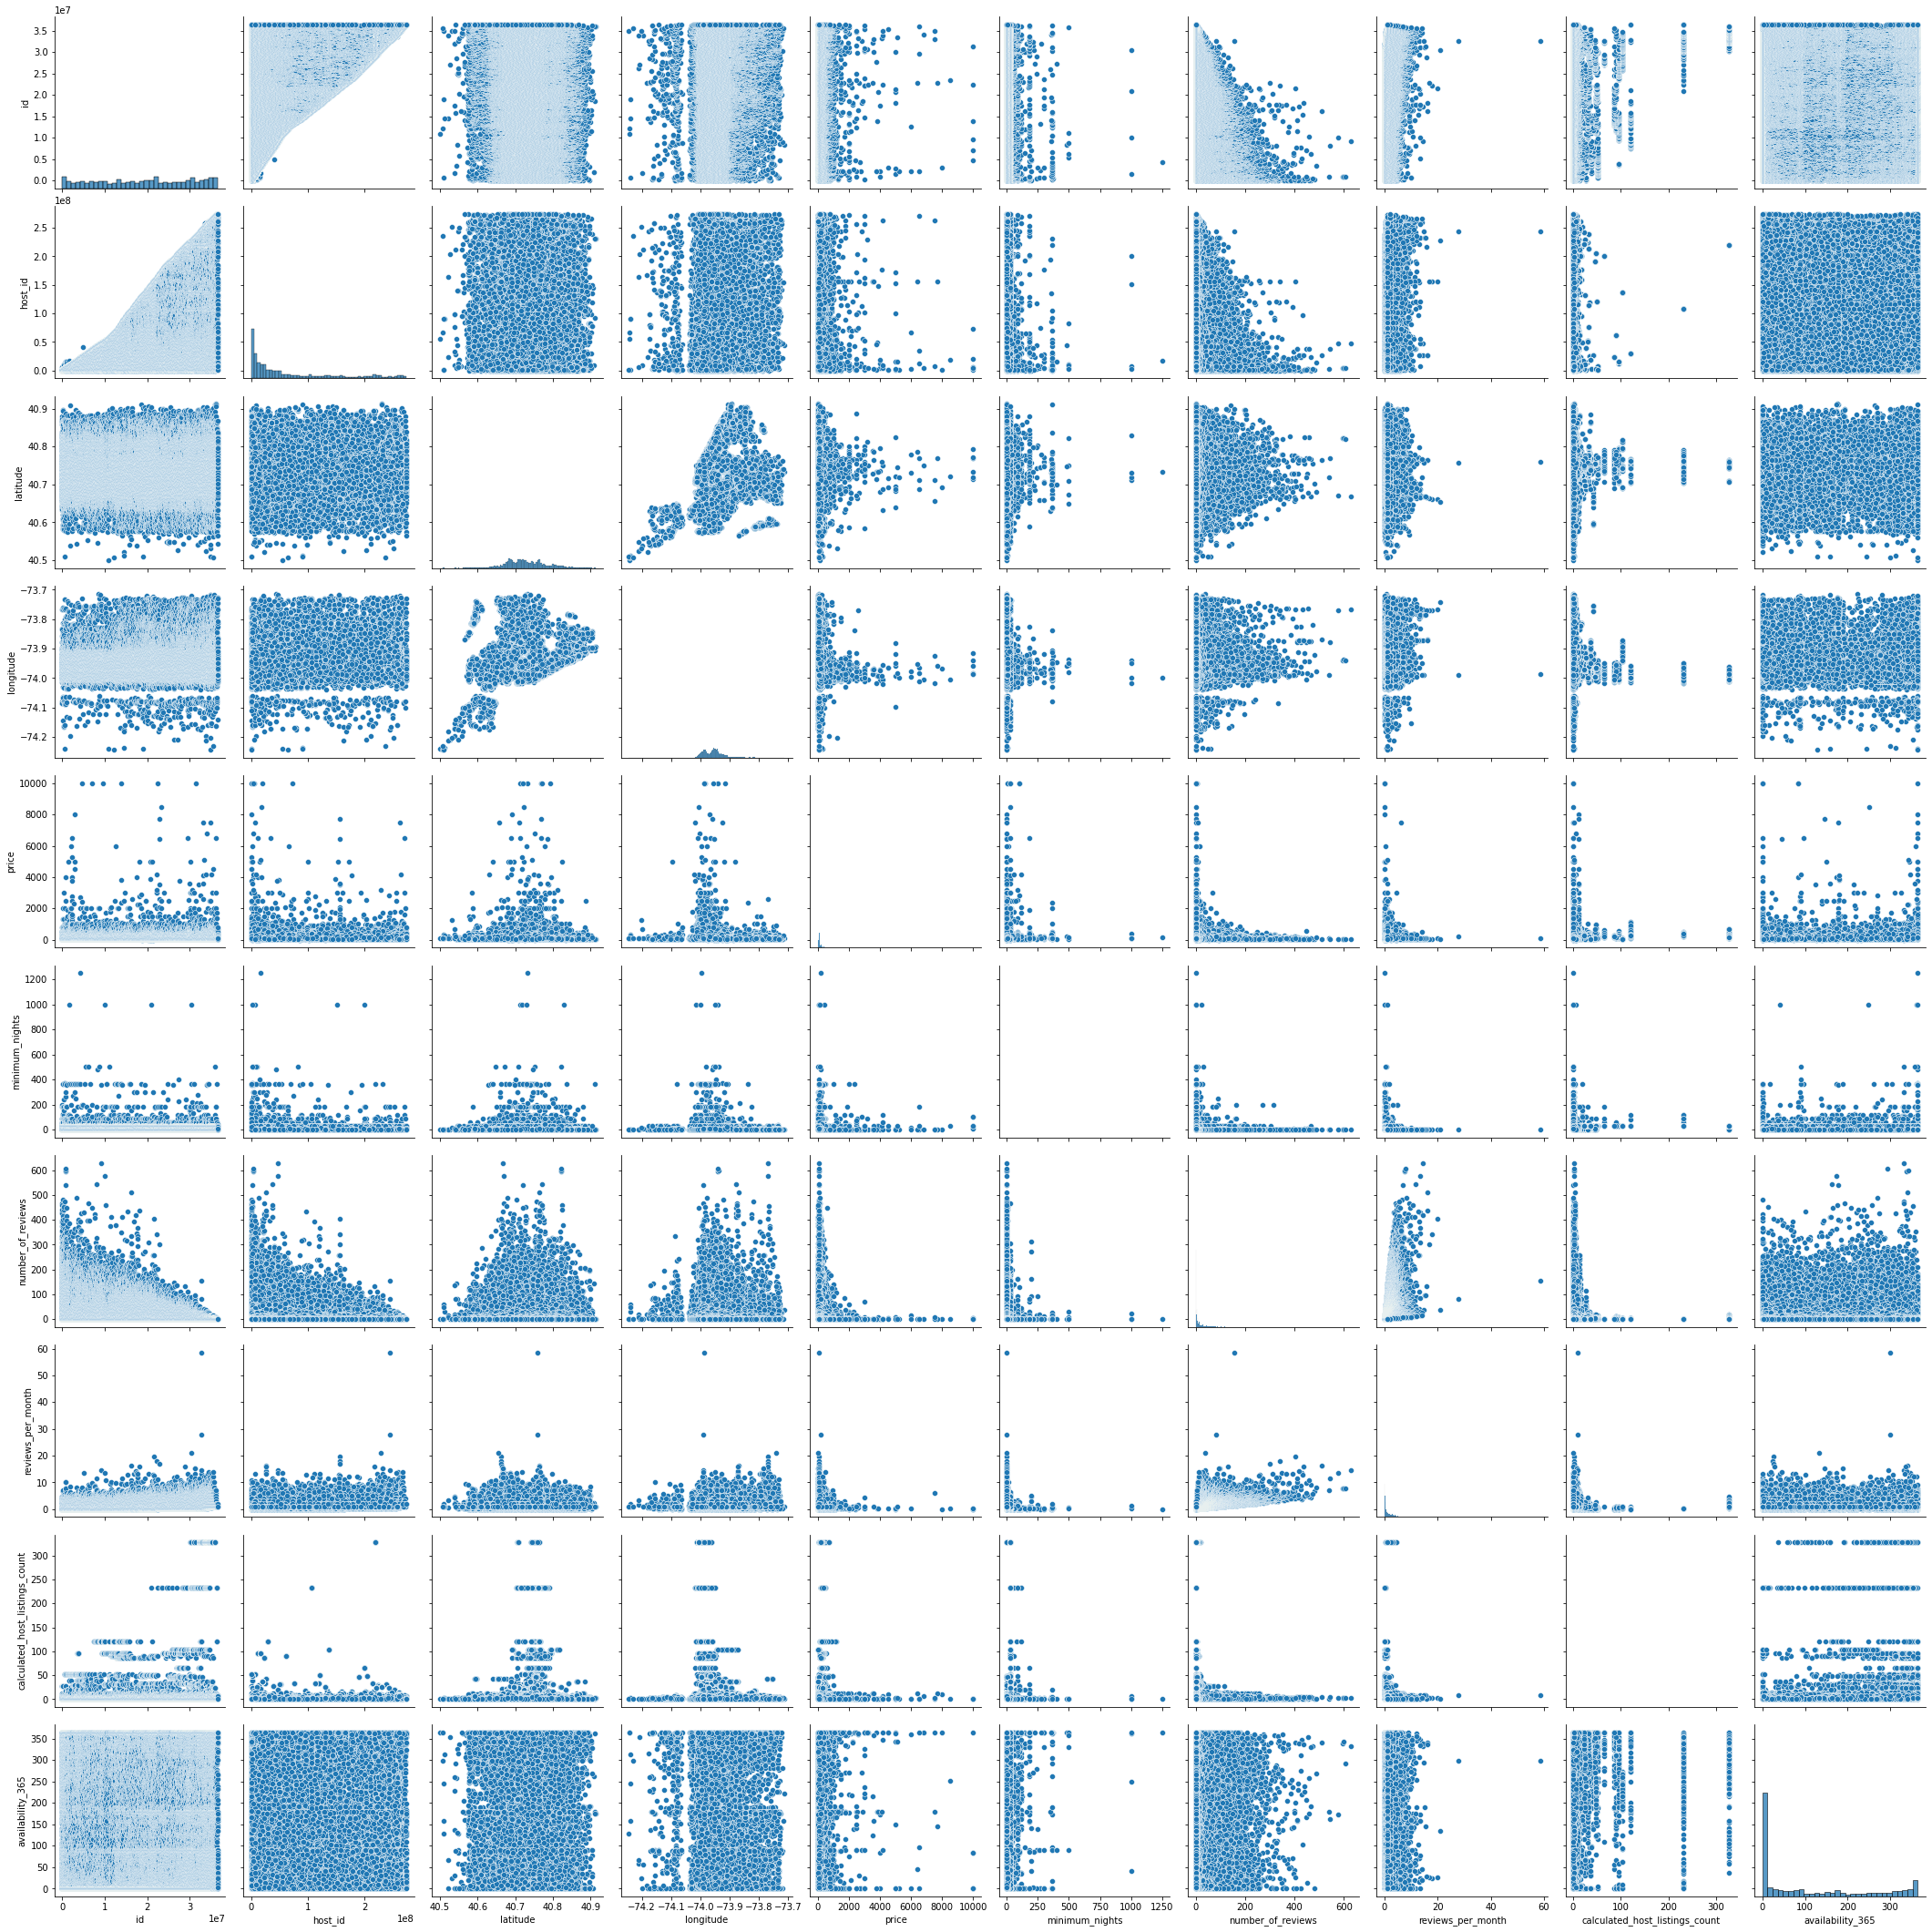

In [7]:
plt.figure(figsize=(30, 30))
sns.pairplot(dataset, height=3, diag_kind="hist")

Remove Duplicates

In [8]:
##Data cleaning
#remove duplicates if any
dataset.duplicated().sum()

0

In [9]:
dataset.drop_duplicates(inplace=True)

In [10]:
dataset.drop(['id','name','host_name'], axis = 1,inplace=True)

In [11]:
dataset.head()

host_id  ... availability_365
0     2787  ...              365
1     2845  ...              355
2     4632  ...              365
3     4869  ...              194
4     7192  ...                0

[5 rows x 13 columns]

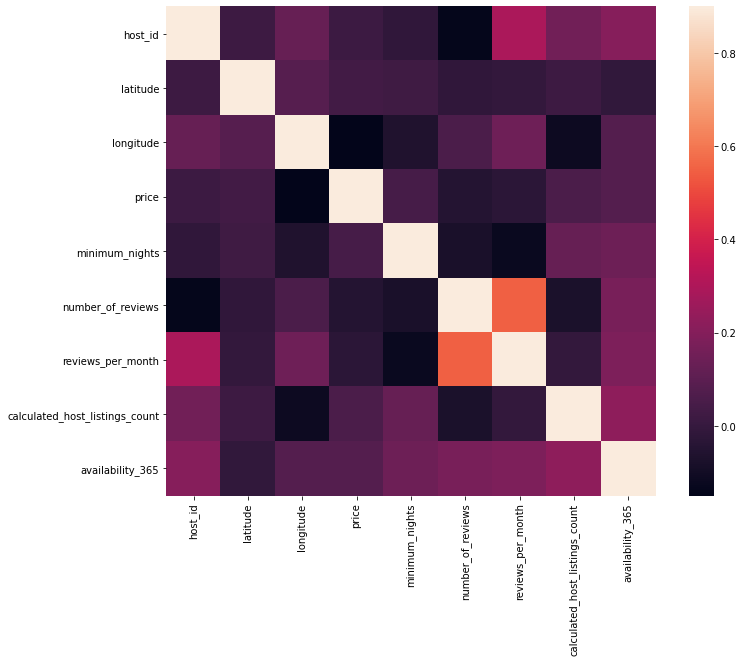

In [12]:
corrmat = dataset.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

host_id column

In [13]:
dataset.isnull().sum()

host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [14]:
dataset.value_counts('host_id')

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
48817598       1
48818023       1
48819868       1
48823036       1
2438           1
Length: 37457, dtype: int64

In [15]:
dataset.drop(['host_id'], axis = 1,inplace=True)

neighbourhood_group

In [16]:
dataset.value_counts('neighbourhood_group')

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
dtype: int64

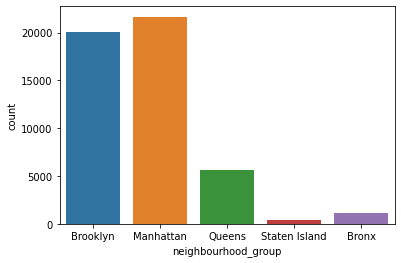

In [17]:
ax = sns.countplot(x="neighbourhood_group", data=dataset)

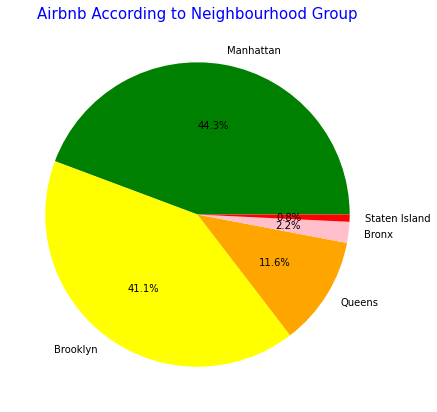

In [18]:
labels = dataset.neighbourhood_group.value_counts().index
colors = ['green','yellow','orange','pink','red']
explode = [0,0,0,0,0]
sizes = dataset.neighbourhood_group.value_counts().values

plt.figure(0,figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Airbnb According to Neighbourhood Group',color = 'blue',fontsize = 15)
plt.show()

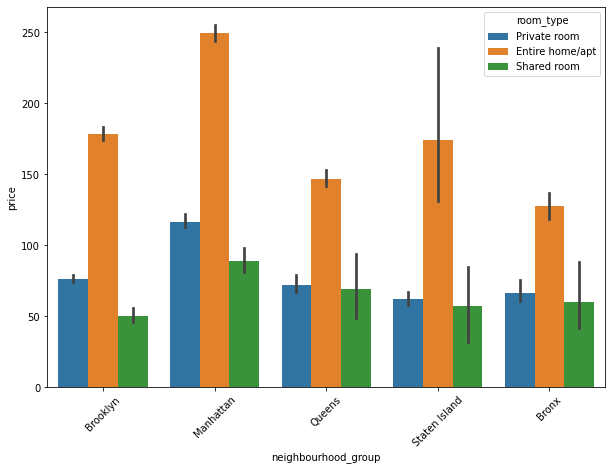

In [19]:
plt.figure(figsize=(10,7))
sns.barplot(x = "neighbourhood_group", y = "price", hue = "room_type", data = dataset)
plt.xticks(rotation=45)
plt.show()

neighbourhood vs availability

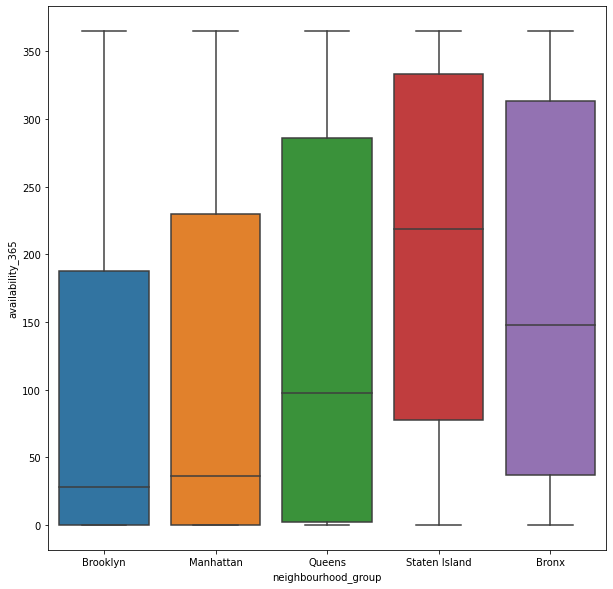

In [20]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=dataset, x='neighbourhood_group',y='availability_365')

Map of New York with neighbourhood groups

In [21]:
import plotly.express as px
fig = px.scatter(dataset, x='longitude', y='latitude',
                 color='neighbourhood_group') # Added color to previous basic 
fig.update_layout(xaxis_title="longitude",yaxis_title="latitude")
fig.show()


In [22]:
#onehot encoding
dataset= pd.get_dummies(dataset,columns=['neighbourhood_group'], prefix_sep='_', drop_first=True)
dataset.head(3)

neighbourhood  ...  neighbourhood_group_Staten Island
0    Kensington  ...                                  0
1       Midtown  ...                                  0
2        Harlem  ...                                  0

[3 rows x 15 columns]

neighbourhood column

In [23]:
dataset.value_counts('neighbourhood')
                                           

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
New Dorp                 1
Willowbrook              1
Fort Wadsworth           1
Richmondtown             1
Rossville                1
Length: 221, dtype: int64

<BarContainer object of 10 artists>

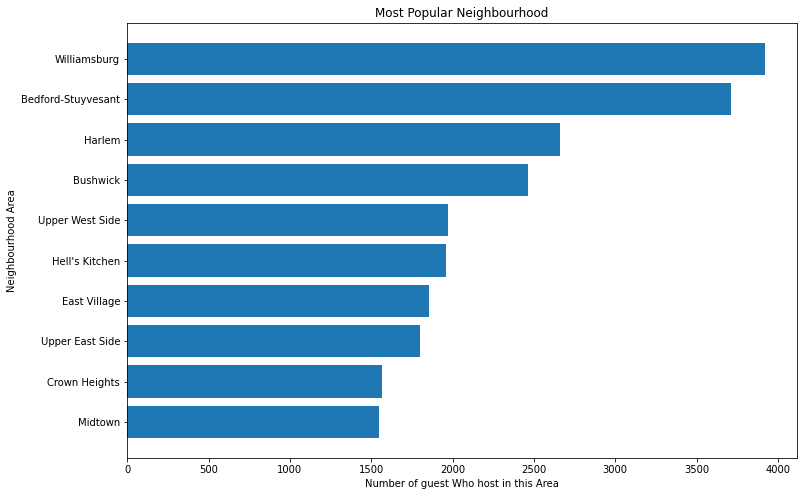

In [24]:
data = dataset.neighbourhood.value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest Who host in this Area")

plt.barh(x, y)

In [25]:
#dropping neighbourhood column
dataset.drop(['neighbourhood'], axis = 1,inplace=True)
#dataset= pd.get_dummies(dataset,columns=['neighbourhood'], prefix_sep='_', drop_first=True)

room_type column

In [26]:
dataset.value_counts('room_type')

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
dtype: int64

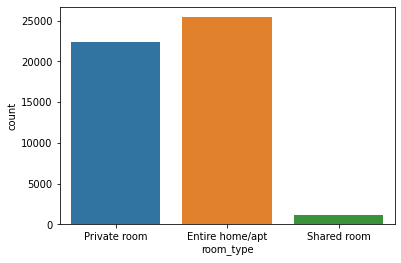

In [27]:
ax = sns.countplot(x="room_type", data=dataset)

roomtype vs availabilty

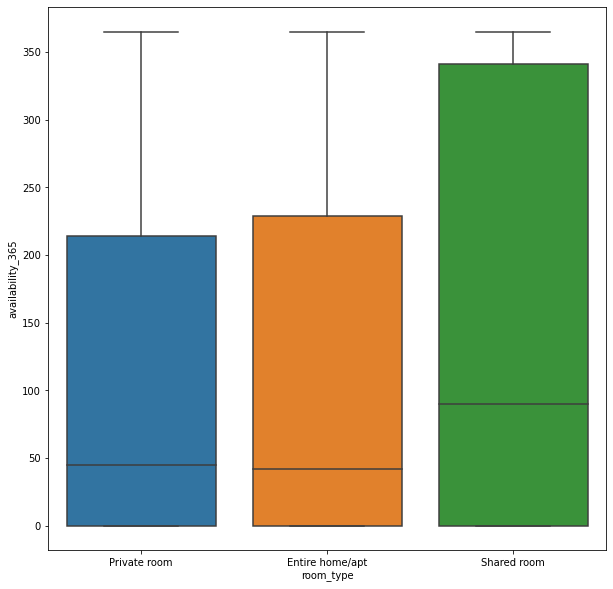

In [28]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=dataset, x='room_type',y='availability_365')

In [29]:
#onehot encoding
dataset= pd.get_dummies(dataset,columns=['room_type'], prefix_sep='_', drop_first=True)
dataset.head(3)

latitude  longitude  ...  room_type_Private room  room_type_Shared room
0  40.64749  -73.97237  ...                       1                      0
1  40.75362  -73.98377  ...                       0                      0
2  40.80902  -73.94190  ...                       1                      0

[3 rows x 15 columns]

minimum_nights

In [30]:
dataset.value_counts('minimum_nights').head(20)

minimum_nights
1     12720
2     11696
3      7999
30     3760
4      3303
5      3034
7      2058
6       752
14      562
10      483
29      340
15      279
20      223
28      203
31      201
21      135
8       130
60      106
90      104
12       91
dtype: int64

In [31]:
max(dataset['minimum_nights'])

1250

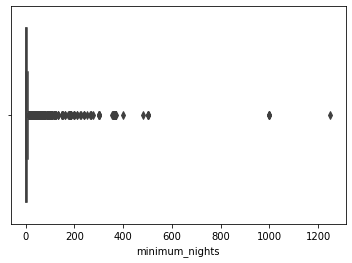

In [32]:
import seaborn as sns
sns.boxplot(x=dataset['minimum_nights'])       #shows that we have a few outliers

In [33]:
### We replace all records with min nights > 30 by 30 to remove the outliers
dataset.loc[(dataset.minimum_nights >30),"minimum_nights"]=30         

number_of_reviews

In [34]:
dataset.value_counts('number_of_reviews')

number_of_reviews
0      10052
1       5244
2       3465
3       2520
4       1994
       ...  
351        1
341        1
340        1
339        1
629        1
Length: 394, dtype: int64

In [35]:
max(dataset['number_of_reviews'])

629

In [36]:
#j=0
#for i in dataset['number_of_reviews']:
#  if 0<=dataset['number_of_reviews'][j]<10:
#    dataset['number_of_reviews'][j]=0
#  elif 10<=dataset['number_of_reviews'][j]<20:
#    dataset['number_of_reviews'][j]=1
#  elif 20<=dataset['number_of_reviews'][j]<50:
#    dataset['number_of_reviews'][j]=2
#  elif 50<=dataset['number_of_reviews'][j]<120:
#    dataset['number_of_reviews'][j]=3
#  elif 120<=dataset['number_of_reviews'][j]<250:
#    dataset['number_of_reviews'][j]=4
#  elif 250<=dataset['number_of_reviews'][j]<450:
#    dataset['number_of_reviews'][j]=5
#  elif 450<=dataset['number_of_reviews'][j]<630:
#    dataset['number_of_reviews'][j]=6  
#  j += 1   

In [37]:
dataset.head()

latitude  longitude  ...  room_type_Private room  room_type_Shared room
0  40.64749  -73.97237  ...                       1                      0
1  40.75362  -73.98377  ...                       0                      0
2  40.80902  -73.94190  ...                       1                      0
3  40.68514  -73.95976  ...                       0                      0
4  40.79851  -73.94399  ...                       0                      0

[5 rows x 15 columns]

last_review column

In [38]:
#dataset['last_review']=dataset['last_review'].fillna('0')

In [39]:
#dataset['last_review_year']=dataset['last_review'].astype('str').transform(lambda x: int(x.split("-")[0])).astype(int)

In [40]:
dataset.drop(['last_review'], axis = 1,inplace=True)

In [41]:
dataset.head()

latitude  longitude  ...  room_type_Private room  room_type_Shared room
0  40.64749  -73.97237  ...                       1                      0
1  40.75362  -73.98377  ...                       0                      0
2  40.80902  -73.94190  ...                       1                      0
3  40.68514  -73.95976  ...                       0                      0
4  40.79851  -73.94399  ...                       0                      0

[5 rows x 14 columns]

reviews_per_month column

In [42]:
dataset['reviews_per_month']=dataset['reviews_per_month'].fillna('0')

In [43]:
dataset.head()

latitude  longitude  ...  room_type_Private room  room_type_Shared room
0  40.64749  -73.97237  ...                       1                      0
1  40.75362  -73.98377  ...                       0                      0
2  40.80902  -73.94190  ...                       1                      0
3  40.68514  -73.95976  ...                       0                      0
4  40.79851  -73.94399  ...                       0                      0

[5 rows x 14 columns]

availability_365

In [44]:
dataset.value_counts('availability_365')

availability_365
0      17533
365     1295
364      491
1        408
89       361
       ...  
195       26
183       24
196       24
181       23
202       20
Length: 366, dtype: int64

Price

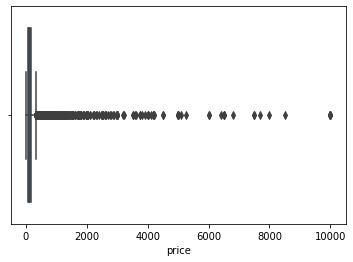

In [45]:
import seaborn as sns
sns.boxplot(x=dataset['price'])

listings having price more than 3000

In [46]:
dataset[dataset["price"]>3000]

latitude  longitude  ...  room_type_Private room  room_type_Shared room
1862   40.67919  -73.97191  ...                       0                      0
2698   40.72193  -73.99379  ...                       0                      0
3537   40.77782  -73.97848  ...                       0                      0
3695   40.79476  -73.97299  ...                       0                      0
3720   40.71895  -73.99793  ...                       0                      0
3774   40.68766  -73.96439  ...                       0                      0
3788   40.73323  -73.98859  ...                       0                      0
4345   40.69572  -73.95731  ...                       1                      0
4376   40.69127  -73.96563  ...                       0                      0
4377   40.69137  -73.96723  ...                       0                      0
6530   40.79264  -73.93898  ...                       0                      0
9151   40.76810  -73.91651  ...                       1                      0
12342  40.71355  -73.98507  ...                       1                      0
15560  40.73046  -73.99562  ...                       0                      0
17665  40.73305  -73.99373  ...                       0                      0
17692  40.73260  -73.95739  ...                       0                      0
21821  40.73571  -74.00780  ...                       0                      0
22353  40.63952  -74.09730  ...                       0                      0
25825  40.68185  -73.88128  ...                       0                      0
25901  40.73300  -73.99413  ...                       0                      0
26739  40.68742  -73.91957  ...                       0                      0
28946  40.74913  -74.00373  ...                       1                      0
28947  40.74888  -74.00481  ...                       0                      0
29238  40.77213  -73.98665  ...                       0                      0
29662  40.76824  -73.95989  ...                       0                      0
29663  40.72779  -73.98644  ...                       0                      0
29664  40.78517  -73.95270  ...                       0                      0
30268  40.72197  -74.00633  ...                       0                      0
34851  40.71364  -74.01758  ...                       0                      0
37194  40.76835  -73.98367  ...                       1                      0
37864  40.76519  -73.96874  ...                       0                      0
38000  40.82511  -73.94961  ...                       0                      0
39243  40.81315  -73.95110  ...                       0                      0
40433  40.71980  -73.98566  ...                       0                      0
41216  40.78742  -73.97011  ...                       0                      0
42523  40.71162  -74.01693  ...                       0                      0
42542  40.78545  -73.97123  ...                       0                      0
42736  40.76043  -73.99132  ...                       0                      0
43009  40.74482  -73.98367  ...                       0                      0
43670  40.68807  -73.95426  ...                       1                      0
44034  40.75060  -74.00388  ...                       0                      0
45666  40.65724  -73.92450  ...                       1                      0
45867  40.63087  -74.02006  ...                       0                      0
46614  40.71705  -73.96470  ...                       0                      0
48043  40.71206  -74.00999  ...                       0                      0

[45 rows x 14 columns]

In [47]:
#239 listings have price per day > 3000. These are either super lavish listings or there was an error during input. Nonetheless, since this records are skewing our data a lot, we will treat them as outliers and drop them.
dataset=dataset[dataset["price"]<3000]

 Removing the price skeweness by using log

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Price Distribution Plot')

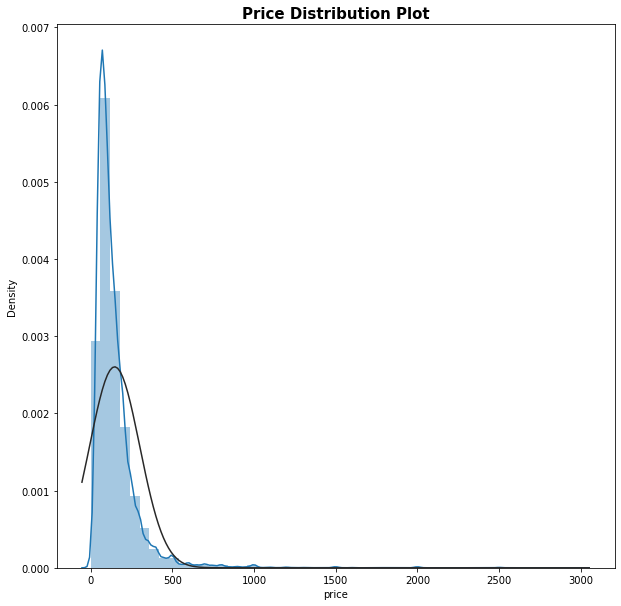

In [48]:
from scipy.stats import norm
plt.figure(figsize=(10,10))
sns.distplot(dataset['price'], fit=norm)
plt.title("Price Distribution Plot",size=15, weight='bold')

The above distribution graph shows that there is a right-skewed distribution on price. This means there is a positive skewness. Log transformation will be used to make this feature less skewed. This will help to make easier interpretation and better statistical analysis

Since division by zero is a problem, log+1 transformation would be better.

In [49]:
dataset['price'] = np.log(dataset.price+1)   #when this wasnt done,the results were much worse

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 1.0, 'Log-Price Distribution Plot')

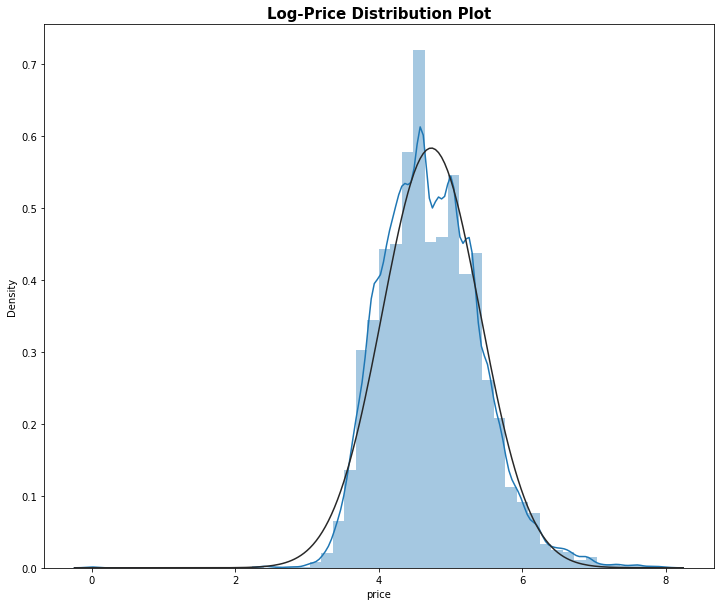

In [50]:
plt.figure(figsize=(12,10))
sns.distplot(dataset['price'], fit=norm)
plt.title("Log-Price Distribution Plot",size=15, weight='bold')
#In below graph, the good fit indicates that normality is a reasonable approximation.

Longitude and latitude

In [51]:
dataset.drop(['latitude','longitude'], axis=1, inplace=True)

Splitting

In [52]:
X= dataset.drop(['price'],axis=1)
y = dataset['price']

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

Feature Scaling

In [54]:
#from sklearn.preprocessing import StandardScaler
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.fit_transform(X_test)


Feature Importance

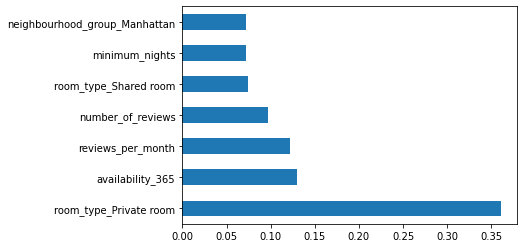

In [55]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X_train,y_train)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.show()

Linear Regression

In [56]:
from sklearn.linear_model import LinearRegression

regressor1 = LinearRegression()
regressor1.fit(X_train,y_train)
y_pred1=(regressor1.predict(X_test))

In [57]:
print(y_pred1)

[5.29009228 4.4066201  4.05787487 ... 4.35527527 5.29640336 5.28703647]


In [58]:
print(np.concatenate((y_pred1.reshape(len(y_pred1),1), y_test.values.reshape(len(y_test),1)),1))

[[5.29009228 5.19295685]
 [4.4066201  4.11087386]
 [4.05787487 3.93182563]
 ...
 [4.35527527 3.4339872 ]
 [5.29640336 5.56452041]
 [5.28703647 5.170484  ]]


In [59]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred1)

0.4908290941170542

In [60]:
print('R-squared train score: {:.3f}'.format(regressor1.score(X_train, y_train)))

print('R-squared test score: {:.3f}'.format(regressor1.score(X_test, y_test)))

R-squared train score: 0.491
R-squared test score: 0.491


In [61]:
### Calculate RMSE
from sklearn import preprocessing, metrics
rmse1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred1))
rmse1

0.49269234635210735

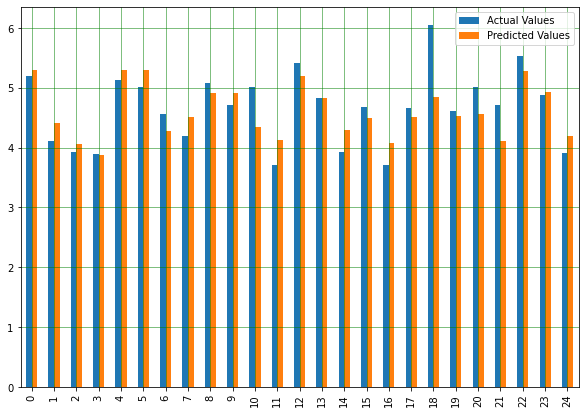

In [62]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred1.flatten()})
df1 = error_diff.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Ridge Regression

In [63]:
from sklearn.linear_model import Ridge

regressor2 = Ridge()
regressor2.fit(X_train, y_train)

y_pred2=regressor2.predict(X_test)

In [64]:
print(y_pred2)

[5.28996928 4.40658051 4.05787951 ... 4.35532886 5.29628624 5.2869211 ]


In [65]:
print(np.concatenate((y_pred2.reshape(len(y_pred2),1), y_test.values.reshape(len(y_test),1)),1))

[[5.28996928 5.19295685]
 [4.40658051 4.11087386]
 [4.05787951 3.93182563]
 ...
 [4.35532886 3.4339872 ]
 [5.29628624 5.56452041]
 [5.2869211  5.170484  ]]


In [66]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred2)

0.4908329008085023

In [67]:
print('R-squared train score: {:.3f}'.format(regressor1.score(X_train, y_train)))

print('R-squared test score: {:.3f}'.format(regressor1.score(X_test, y_test)))

R-squared train score: 0.491
R-squared test score: 0.491


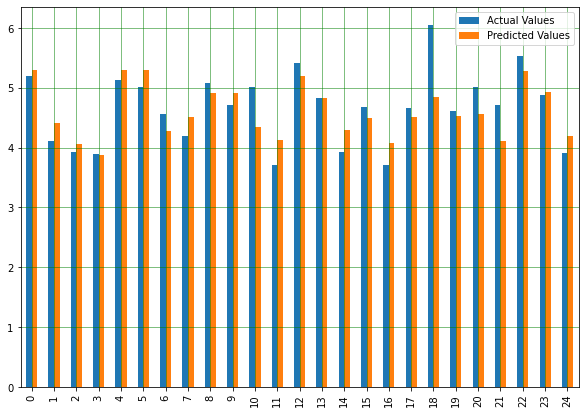

In [68]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred2.flatten()})
df1 = error_diff.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Lasso Regression

In [69]:
from sklearn.linear_model import Lasso

regressor3 = Lasso(alpha=10,max_iter = 10000)
regressor3.fit(X_train, y_train)

Lasso(alpha=10, copy_X=True, fit_intercept=True, max_iter=10000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [70]:
y_pred3=regressor3.predict(X_test)

In [71]:
print(np.concatenate((y_pred3.reshape(len(y_pred3),1), y_test.values.reshape(len(y_test),1)),1))

[[4.73290944 5.19295685]
 [4.73290944 4.11087386]
 [4.73290944 3.93182563]
 ...
 [4.73290944 3.4339872 ]
 [4.73290944 5.56452041]
 [4.73290944 5.170484  ]]


In [72]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred3)

-4.0176252125156964e-07

In [73]:
print('R-squared train score: {:.3f}'.format(regressor3.score(X_train, y_train)))

print('R-squared test score: {:.3f}'.format(regressor3.score(X_test, y_test)))

R-squared train score: 0.000
R-squared test score: -0.000


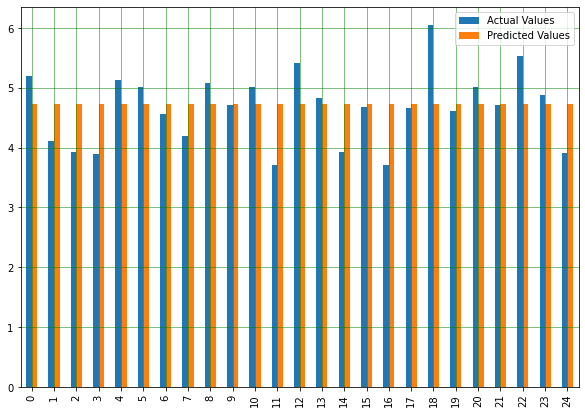

In [74]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred3.flatten()})
df1 = error_diff.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Decision Tree

In [75]:
from sklearn.tree import DecisionTreeRegressor
regressor4=DecisionTreeRegressor(min_samples_leaf=.0001)
regressor4.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.0001, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [76]:
y_pred4=regressor4.predict(X_test)

In [77]:
print(np.concatenate((y_pred4.reshape(len(y_pred4),1), y_test.values.reshape(len(y_test),1)),1))

[[5.23791444 5.19295685]
 [4.2186945  4.11087386]
 [3.72857946 3.93182563]
 ...
 [4.47634297 3.4339872 ]
 [4.93056617 5.56452041]
 [5.42766569 5.170484  ]]


In [78]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred4)

0.4083787542744566

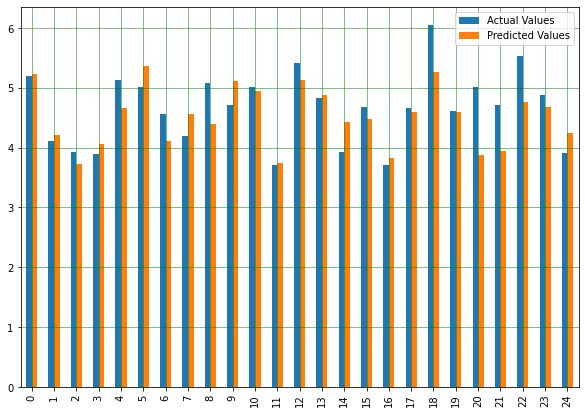

In [79]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred4.flatten()})
df1 = error_diff.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Random Forest

In [80]:
from sklearn.ensemble import RandomForestRegressor

regressor5 = RandomForestRegressor()
regressor5.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [81]:
y_pred5=regressor5.predict(X_test)

In [82]:
print(np.concatenate((y_pred5.reshape(len(y_pred5),1), y_test.values.reshape(len(y_test),1)),1))

[[5.30007941 5.19295685]
 [4.09533739 4.11087386]
 [3.72760143 3.93182563]
 ...
 [4.44402054 3.4339872 ]
 [5.01614634 5.56452041]
 [5.17064546 5.170484  ]]


In [83]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred5)

0.5156561427636153

In [84]:
regressor5.score(X_train,y_train)

0.8459369022686742

In [85]:
### Calculate RMSE
from sklearn import preprocessing, metrics
rmse5 = np.sqrt(metrics.mean_squared_error(y_test, y_pred5))
rmse5

0.4805304620270203

In [86]:
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred5))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred5))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

Mean Absolute Error: 0.35133434934117064
Mean Squared Error: 0.23090952493590164
Root Mean Squared Error: 0.4805304620270203


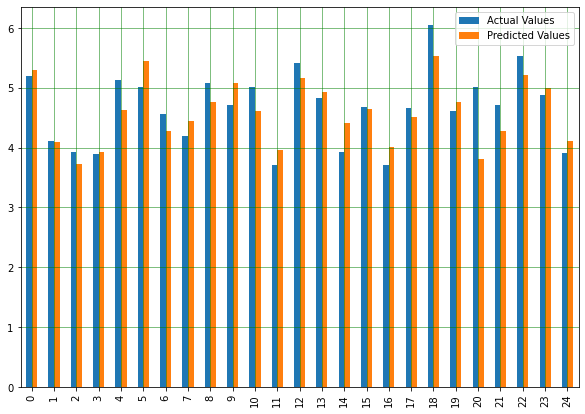

In [87]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred5.flatten()})
df1 = error_diff.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

SVR

In [88]:
from sklearn.svm import SVR
regressor6=SVR(kernel='rbf')
regressor6.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [89]:
y_pred6=regressor6.predict(X_test)

In [90]:
print(np.concatenate((y_pred6.reshape(len(y_pred6),1), y_test.values.reshape(len(y_test),1)),1))

[[4.87049678 5.19295685]
 [4.46802381 4.11087386]
 [4.42338124 3.93182563]
 ...
 [4.44447299 3.4339872 ]
 [4.9051684  5.56452041]
 [4.8960773  5.170484  ]]


In [91]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred5)

0.5156561427636153

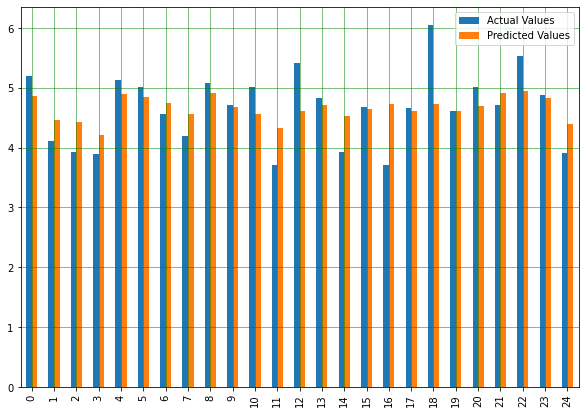

In [92]:
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred6.flatten()})
df1 = error_diff.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

The results weren't that great because we have outliers in our data

We will use the IQR metric to remove outliers, then fit again. From wikipedia -

The interquartile range (IQR), also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q3 − Q1.

In [103]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

price                                  0.921989
minimum_nights                         4.000000
number_of_reviews                     23.000000
calculated_host_listings_count         1.000000
availability_365                     226.750000
neighbourhood_group_Brooklyn           1.000000
neighbourhood_group_Manhattan          1.000000
neighbourhood_group_Queens             0.000000
neighbourhood_group_Staten Island      0.000000
room_type_Private room                 1.000000
room_type_Shared room                  0.000000
dtype: float64


In [94]:
#Make a new DataFrame with outliers removed.
IQR_dataset = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]
IQR_dataset.shape

(28357, 12)

In [95]:
X1= IQR_dataset.drop(['price'],axis=1)
y1 = IQR_dataset['price']

In [96]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=0.25)

Linear Regression on new outlier removed data

In [97]:
from sklearn.linear_model import LinearRegression

regressor7 = LinearRegression()
regressor7.fit(X_train1,y_train1)
y_pred7=(regressor7.predict(X_test1))

In [98]:
print(np.concatenate((y_pred7.reshape(len(y_pred7),1), y_test1.values.reshape(len(y_test1),1)),1))

[[4.46065615 4.51085951]
 [4.92505907 4.79579055]
 [4.15234589 3.71357207]
 ...
 [4.92764555 4.91265489]
 [4.98780138 5.3981627 ]
 [5.20278358 5.01727984]]


In [99]:
from sklearn.metrics import r2_score
r2_score(y_test1,y_pred7)

0.4967292250847587

RFR

In [100]:
from sklearn.ensemble import RandomForestRegressor

regressor8 = RandomForestRegressor()
regressor8.fit(X_train1, y_train1)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [101]:
y_pred8=regressor8.predict(X_test1)

In [102]:
from sklearn.metrics import r2_score
r2_score(y_test1,y_pred8)

0.4587784078731447